In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from scipy.optimize import curve_fit
from scipy.optimize import minimize
import glob
import astropy.units as u
import astropy.constants as const
from astropy.coordinates import SkyCoord, CartesianRepresentation, Galactic,  cartesian_to_spherical

In [3]:
#USANDO DAT
catalogo = pd.read_csv('/home/eduarda/Downloads/Pantheon+SH0ES.dat', delimiter='\s+')
catalogo

,CID,IDSURVEY,zHD,zHDERR,zCMB,zCMBERR,zHEL,zHELERR,m_b_corr,m_b_corr_err_DIAG,...,PKMJDERR,NDOF,FITCHI2,FITPROB,m_b_corr_err_RAW,m_b_corr_err_VPEC,biasCor_m_b,biasCorErr_m_b,biasCor_m_b_COVSCALE,biasCor_m_b_COVADD
0,2011fe,51,0.00122,0.00084,0.00122,0.00002,0.00082,0.00002,9.74571,1.516210,...,0.1071,36,26.88590,0.864470,0.0991,1.4960,0.0381,0.005,1.000,0.003
1,2011fe,56,0.00122,0.00084,0.00122,0.00002,0.00082,0.00002,9.80286,1.517230,...,0.0579,101,88.30640,0.812220,0.0971,1.4960,-0.0252,0.003,1.000,0.004
2,2012cg,51,0.00256,0.00084,0.00256,0.00002,0.00144,0.00002,11.47030,0.781906,...,0.0278,165,233.50000,0.000358,0.0399,0.7134,0.0545,0.019,1.000,0.036
3,2012cg,56,0.00256,0.00084,0.00256,0.00002,0.00144,0.00002,11.49190,0.798612,...,0.0667,55,100.12200,0.000193,0.0931,0.7134,0.0622,0.028,1.000,0.040
4,1994DRichmond,50,0.00299,0.00084,0.00299,0.00004,0.00187,0.00004,11.52270,0.880798,...,0.0522,146,109.83900,0.988740,0.0567,0.6110,0.0650,0.009,1.000,0.006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,rutledge,106,1.61505,0.00545,1.61499,0.00500,1.61399,0.00500,25.90650,0.331927,...,1.7256,8,2.92493,0.938980,0.2230,0.0106,-0.0203,0.005,1.000,0.002
1697,geta,106,1.69706,0.04006,1.69702,0.04000,1.70000,0.04000,26.03330,0.379521,...,1.8973,12,9.15387,0.689730,0.3209,0.0748,0.2680,0.005,0.633,0.000
1698,stone,106,1.80119,0.02014,1.80111,0.02000,1.80000,0.02000,26.23350,0.280685,...,1.1631,11,11.69320,0.387140,0.2370,0.0358,-0.0968,0.004,0.641,0.000
1699,wilson,106,1.91165,0.00263,1.91160,0.00100,1.91401,0.00100,26.17030,0.357624,...,1.4902,9,5.54378,0.784570,0.3168,0.0044,-0.3835,0.013,0.604,0.000


In [67]:
data = catalogo[(catalogo['zCMB']>=0.015)&(catalogo['zCMB']<=0.05)]
len(data)

471

In [31]:
zdata = data['zCMB']
zedata = data['zCMBERR']

mudata = data['MU_SH0ES']
muedata = data['MU_SH0ES_ERR_DIAG']

radata = data['RA']
decdata = data['DEC']

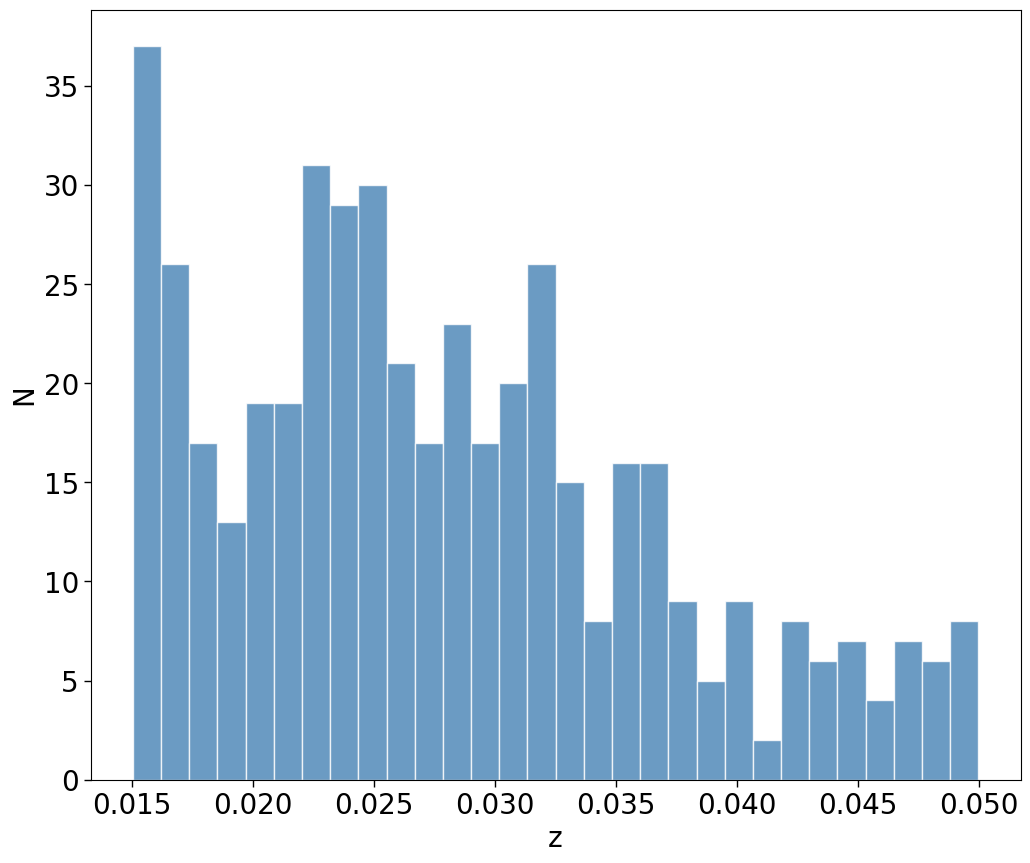

In [68]:
fig = plt.figure(figsize=(12, 10))
plt.hist(zdata, bins=30, histtype='bar', fill=True, edgecolor='white', alpha=0.8, color='steelblue')
plt.xlabel("z", fontsize=20)
plt.ylabel("N", fontsize=20)
plt.tick_params(axis='both', labelsize=20, length=5, which='both', width=1 )
#plt.savefig('/home/eduarda/Documentos/Fermi/FULL/hist_fredshift.pdf', bbox_inches='tight', dpi=600)
plt.show()

In [32]:
coord = SkyCoord(ra=radata, dec=decdata, frame='icrs', unit='deg')
coordenadas = coord.galactic

l = (coordenadas.l.deg)*np.pi/180
b = (coordenadas.b.deg)*np.pi/180

In [33]:
l[l > np.pi] = l[l > np.pi] - 2*np.pi
l[l < np.pi] = l[l < np.pi]*(-1)

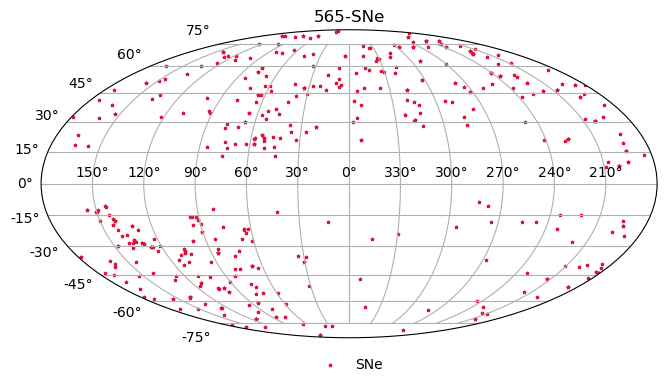

In [34]:
figure = plt.figure(figsize=(8.0, 4.0))
ax = figure.add_subplot(111, projection='mollweide')
plt.scatter(l, b, s=4, color='crimson', marker ='*', label='SNe')
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]), labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.title('565-SNe')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.15), ncol=3,  frameon=False)
plt.grid()
#plt.savefig('/home/eduarda/Imagens/TESTE/pantheon_shoes_completo.pdf', bbox_inches='tight', dpi=600)
plt.show()

# $\mu = 5*log(dL)+25$
# $dL = 10^{(\mu-25)/5}$
# P.s esta expressão dL está em Mpc

In [35]:
#Distância
exp = (mudata-25)/5
dist = np.power(10, exp)
#calcular a propagação de erro

#velocidade de recessão Lei de Hubble
c = const.c.decompose().to('km/s').value
v = c*zdata

# v =cz = H0*dL
# para o ajuste linear vamos usar $dL = cz/H0$

In [37]:
def f(z, H0):
    c = const.c.decompose().to('km/s').value
    return (c*z)/H0

In [64]:
curve, cove = curve_fit(f, zdata, dist, method='trf')
cov = np.array(np.sqrt(np.diag(cove)))

In [65]:
#Vou definir H0 e o erro de H0 arredondando para duas casas decimais
H0 = np.around(curve[0], 2)
H0_err = float(np.around(cov[0], 2))

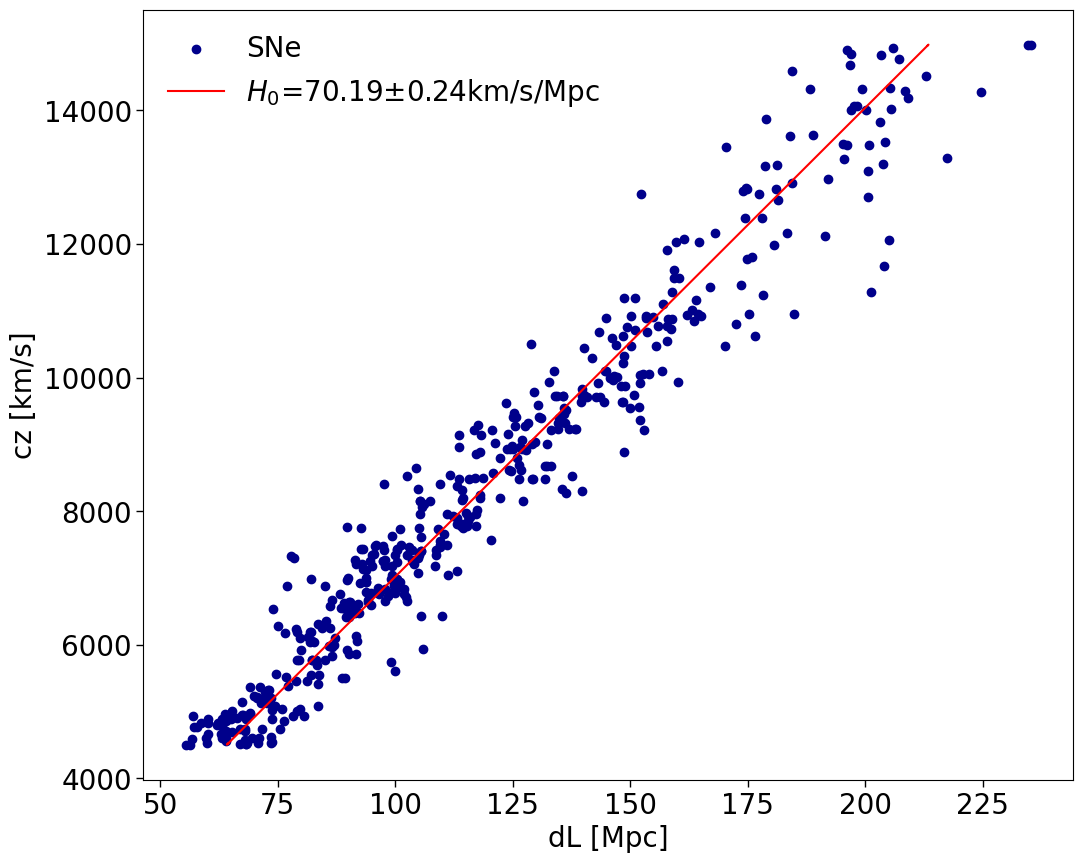

In [66]:
fig = plt.figure(figsize=(12, 10))
plt.scatter(dist, v, label='SNe', color='darkblue')
plt.plot(f(zdata, curve[0]), v, color='red', label='$H_{0}$='+str(H0)+'$\pm$'+str(H0_err)+'km/s/Mpc')
plt.xlabel("dL [Mpc]", fontsize=20)
plt.ylabel("cz [km/s]", fontsize=20)
plt.tick_params(axis='both', labelsize=20, length=5, which='both', width=1 )
plt.legend(fontsize=20, frameon=False)
#plt.savefig('/home/eduarda/Documentos/Fermi/FULL/hist_fluence_fermi_map.pdf', bbox_inches='tight', dpi=600)
plt.show()